# OpenCV showcase2 ～雑SNOWもどきしよう～

## この章でやること
* プリセットを利用した顔検知
* 画像リサイズ
* 画像の位置指定合成
    
上記の技術を利用して、下記処理を実装します。    
1. 写真の中から顔を検出する
2. 検出した顔にPyLadies Tokyoのマスコットの顔を上書きする

## この章でやらないこと
1.   機械学習系機能の説明
2.   NumpyなどのOpenCV以外のライブラリの説明(できる前提で進めます)

In [1]:
import cv2

In [2]:
# 今回使う画像の読み込み
target = cv2.imread('pyladies.png')

In [3]:
# 画像のグレースケール化
# グレースケール化することで画像内の情報量を落とし、顔判別に処理を集中させます(ノイズ軽減)
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

顔を判別させるためには顔の学習データが必要です。    
この学習データはGithub上で公開されていますので、利用したいものを取得しましょう。    
[https://github.com/opencv/opencv/tree/master/data](https://github.com/opencv/opencv/tree/master/data)    
    
今回はこのディレクトリにデータを持ってきてありますので、それを利用します。   

In [4]:
# 顔検出モデル読み込み
cascade_model = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [5]:
# 顔検出
rectangles = cascade_model.detectMultiScale(target_gray)

顔検出で取得したデータは下記の情報を含んでいます。
1. 顔検知範囲の左上角の座標
2. 顔の縦横の大きさ
    
![情報イメージ](./display/example.jpg)

In [6]:
# 置き換える顔画像の読み込み
new_face = cv2.imread('tokyo.jpg')

In [7]:
# さあみんな！新しい顔よ～！

for x, y, face_width, face_height in rectangles:
    # 顔のサイズに差し替える顔をリサイズ
    adjust_new_face = cv2.resize(new_face, (face_width, face_height))

    # 顔に新しい顔を上書き
    target[y: y+face_height, x: x+face_width] = adjust_new_face

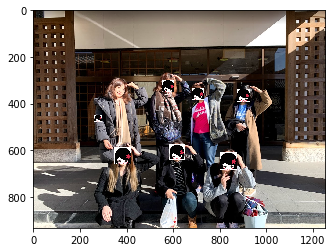

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))